In [1]:
# 如何知道有多少數據
from keras import datasets
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
#print(dir(datasets))

Using CNTK backend


GPU


In [2]:
from keras.datasets import mnist

In [3]:
# 數據是28 * 28 = 784
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

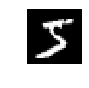

In [4]:
# 畫一張
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Lab2_LogisticRegression - 講解 - Lab
# 增加 特徵數量 可以增加精準度
# 試試看  (normalized pixel value, square of normalized value, and square root of normalized value). 

In [5]:
# data pre-processing
X_train, X_test = X_train.astype(np.float32).reshape(60000, 784)/255, X_test.astype(np.float32).reshape(10000, 784)/255
# one_hot encoding
y_train_oh, y_test_oh = to_categorical(y_train), to_categorical(y_test) 

In [ ]:
# y_train[:10] , y_train_oh[:10]

In [6]:
# build model
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
model = Sequential()
model.add( Dense(units=10, input_shape=(784,) ) )
model.add( Dense(units=10, activation='softmax') )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train model 
# ValueError: Error when checking target: expected dense_3 to have 2 dimensions
# but got array with shape (60000, 10, 2, 2)
# ValueError: Error when checking target: expected dense_6 to have shape (10,) but got array with shape (1,)

model.compile(optimizer=optimizers.SGA( 0.2), loss='categorical_crossentropy', metrics=['accuracy'] )
history = model.fit(X_train, y_train_oh, batch_size=64, validation_split=0.1, epochs=10, verbose=1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.2585 - acc: 0.9263 - val_loss: 0.2414 - val_acc: 0.9357
Epoch 2/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.2572 - acc: 0.9281 - val_loss: 0.2533 - val_acc: 0.9317
Epoch 3/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.2572 - acc: 0.9276 - val_loss: 0.2463 - val_acc: 0.9332
Epoch 4/10
54000/54000 [==============================] - 3s 55us/step - loss: 0.2566 - acc: 0.9274 - val_loss: 0.2506 - val_acc: 0.9333
Epoch 5/10
54000/54000 [==============================] - 3s 55us/step - loss: 0.2559 - acc: 0.9278 - val_loss: 0.2523 - val_acc: 0.9293
Epoch 6/10
54000/54000 [==============================] - 3s 55us/step - loss: 0.2563 - acc: 0.9273 - val_loss: 0.2462 - val_acc: 0.9325
Epoch 7/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.2562 - acc: 0.9280 - val_loss: 0.2479 - val_acc:

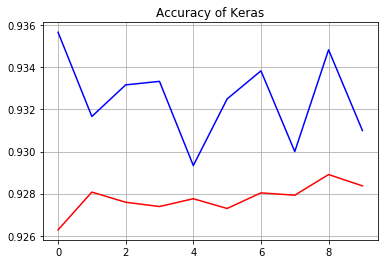

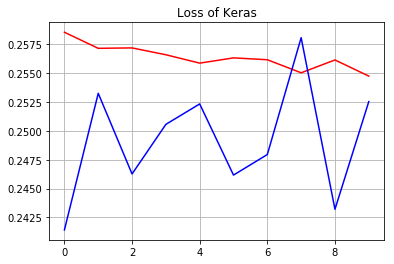

In [9]:
# Plot
plt.title('Accuracy of Keras')
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.grid()
plt.show()


plt.title('Loss of Keras')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.grid()
plt.show()

In [10]:
# evaluate model 
print(model.evaluate(X_train, y_train_oh), model.evaluate(X_test, y_test_oh) )
# predict model 
y_pred = model.predict(X_test)

10000/10000 [==============================] - 1s 66us/step
[0.2529372300858299, 0.9293666666666667] [0.2966662008479238, 0.9199]


In [ ]:
# top 10 
# 請你找一下那些數字是錯誤 slicing 
index_error = np.argmax(y_pred, axis=1) != np.argmax(y_test_oh, axis=1)

X_error      =  X_test[ index_error ]
y_error      =  y_test_oh[ index_error ]
y_error_pred =  y_pred[ index_error ]

print('Total error amount is {}'.format(X_error.shape[0]))

# Plot for top 10 [:10]
for i in range(10):
    plt.figure(figsize=(1,1))
    plt.title('GT:{} --> Pred:{}'.format(np.argmax(y_error[i]), np.argmax(y_error_pred[i])) )
    plt.imshow(X_error[i].reshape(28,28), cmap='gray' )
    plt.axis('off')
    plt.show()